In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import dxchange
from tqdm import tqdm
import timeit
import multiprocessing as mp
# from joblib import Parallel, delayed

olefile module not found


In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
ncore = 48
if ncore > mp.cpu_count():
    ncore = mp.cpu_count()
ncore

48

# Workflow starts here!

In [4]:
###################### need to change start
ipts="19458"
###################### need to change end

## Find file location

In [10]:
# ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon"
os.listdir(ct_loc)

['ob', 'dc', 'ct_scans']

In [16]:
folder_name = "dc"
ct_dir = os.path.join(ct_loc, folder_name)
fname_list = sorted(os.listdir(ct_dir))

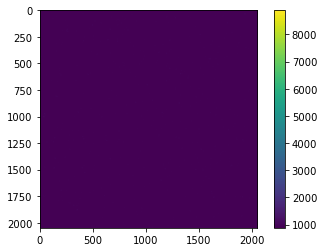

In [17]:
img_idx = 2
img = dxchange.read_tiff(os.path.join(ct_dir, fname_list[img_idx]))
plt.imshow(img)
plt.colorbar()
plt.show()

Cropped:


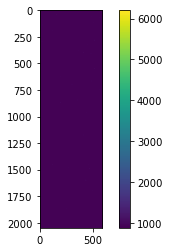

In [18]:
###################### need to change start
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 710
crop_right = 1300
crop_top = 0
crop_bottom = 2048
###################### need to change end
crop = True
img = dxchange.read_tiff(os.path.join(ct_dir, fname_list[img_idx]))
img_crop = rocku.crop(img, crop_left, crop_right, crop_top, crop_bottom, crop)
print("Cropped:")
plt.imshow(img_crop)
plt.colorbar()
plt.show()

In [19]:
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/rockit/" + folder_name + "_crop"
for efname in fname_list:
    _img = dxchange.read_tiff(os.path.join(ct_dir, efname))
    _img_crop = rocku.crop(_img, crop_left, crop_right, crop_top, crop_bottom, crop)
#     _img_crop = -1 * _img_crop
    _save_path = os.path.join(save_to, efname)
    print('Saving {} ...'.format(_save_path))
    dxchange.write_tiff(_img_crop, fname=_save_path, overwrite=True)

Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_000_0000.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_100_0001.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_200_0002.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_300_0003.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_400_0004.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_500_0005.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_shutter_shut_BC3bottom_GC1topa_0050_000_600_0006.tiff ...
Saving /HFIR/CG1D/IPTS-19458/shared/autoreduce/rockit/dc_crop/20170522_DF_sh